# **Proyecto 2: Segmentación**
Ana Garzon S. & Santiago Diaz J.

##**Introducción**

La malaria o paludismo es una enfermedad infecciosa, típica de países tropicales, contagiada a través de la picadura de mosquitos. Según wikipedia, es la primera enfermedad de importancia entre las enfermedades debilitantes. Más de 400 000 personas mueren al año por causa de la malaria, de los cuales unos 240 000 son niños.

La OMS recomienda que antes de administrar el tratamiento se confirme el diagnóstico con métodos parasitológicos, siendo la técnica de conteo de leucocitos por gota gruesa una técnica popular y efectiva para realizarlo.

Este proyecto consiste en diseñar e implementar un algoritmo de detección y conteo de leucocitos para el diagnóstico de malaria mediante la técnica de gota gruesa. Para ello, se busca realizar un correcto conteo de los leucocitos en 3 imagenes utilizando técnicas de segmentación.


##**Metodología**

Llevaremos a cabo el siguiente proceso

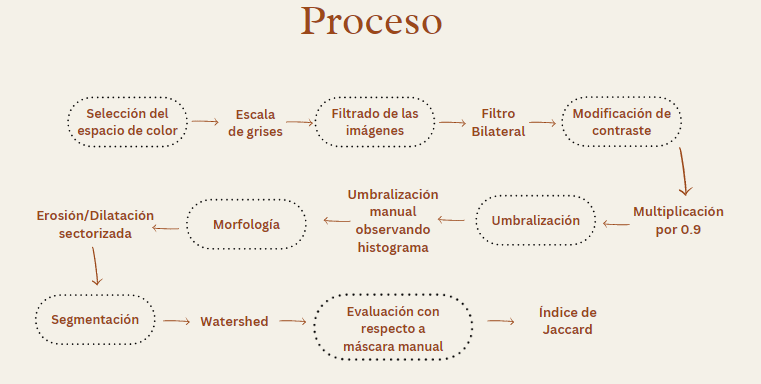

Comenzaremos importando las librerías necesarias para el proyecto

In [ ]:
import cv2 # Métodos de visión por computadora
import matplotlib.pyplot as plt # Creación y visualización de gráficas e imagenes
import numpy as np # Manipular matrices o tablas
from sklearn.metrics import jaccard_score # Evaluar la precisión de las máscaras

A continuación, visualizaremos las imagenes y realizaremos la **selección del espacio de color**

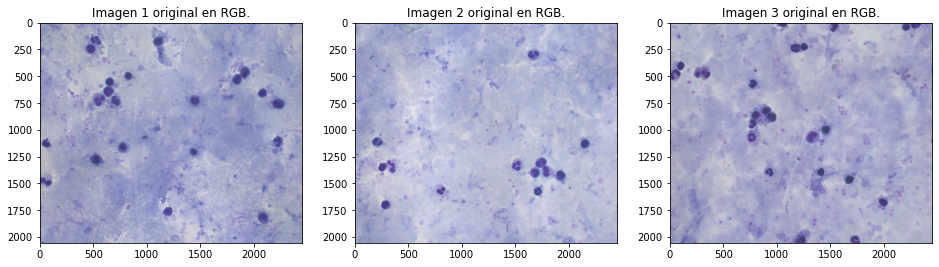

In [ ]:
img1 = cv2.imread('image_1.png')
img2 = cv2.imread('image_2.png')
img3 = cv2.imread('image_3.png')
img1rgb=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2rgb=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3rgb=cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16, 8))

plt.subplot(131)
plt.title('Imagen 1 original en RGB.')
plt.imshow(img1rgb)
plt.subplot(132)
plt.title('Imagen 2 original en RGB.')
plt.imshow(img2rgb)
plt.subplot(133)
plt.title('Imagen 3 original en RGB.')
plt.imshow(img3rgb)

plt.show()

Comparando con las máscaras originales, podemos ver que los núcleos de los leucocitos tienen una coloración violeta fuerte, los leucocitos en su totalidad tienen una membrana menos distinguible del fondo, y el fondo está en un púrpura blancuzco. También podemos notar que hay laucocitos muy cercanos a otros. Con el fin de averiguar si conviene realizar el proceso en una componente de color en específico, visulizaremos las imagenes en R,G y B

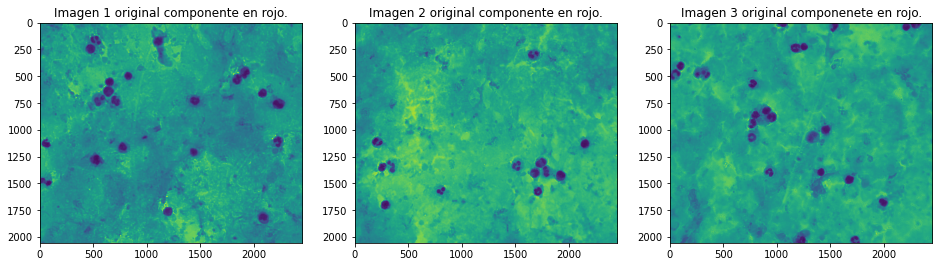

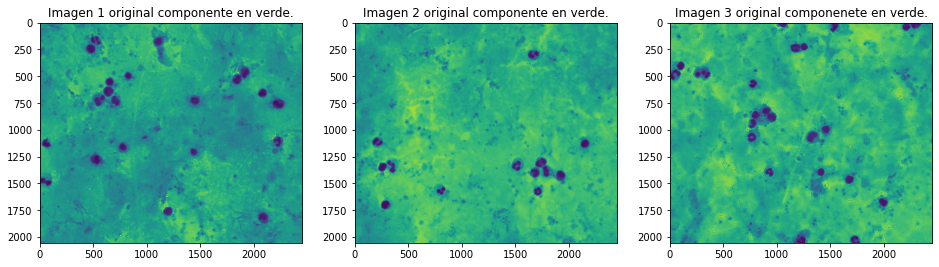

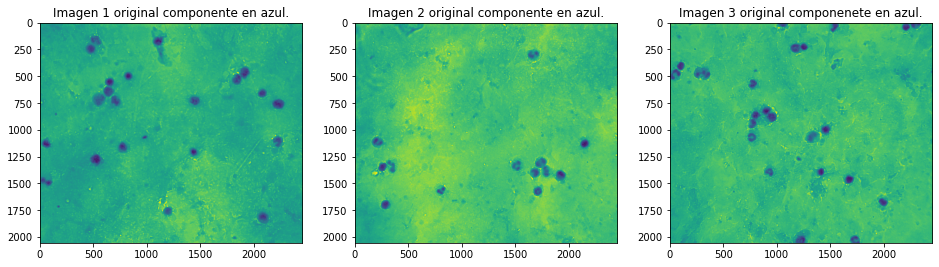

In [ ]:
R1,G1,B1 = cv2.split(img1rgb)
R2,G2,B2 = cv2.split(img2rgb)
R3,G3,B3 = cv2.split(img3rgb)

plt.figure(figsize=(16, 8))
plt.subplot(131)
plt.title('Imagen 1 original componente en rojo.')
plt.imshow(R1)
plt.subplot(132)
plt.title('Imagen 2 original componente en rojo.')
plt.imshow(R2)
plt.subplot(133)
plt.title('Imagen 3 original componenete en rojo.')
plt.imshow(R3)
plt.show()

plt.figure(figsize=(16, 8))
plt.subplot(131)
plt.title('Imagen 1 original componente en verde.')
plt.imshow(G1)
plt.subplot(132)
plt.title('Imagen 2 original componente en verde.')
plt.imshow(G2)
plt.subplot(133)
plt.title('Imagen 3 original componenete en verde.')
plt.imshow(G3)
plt.show()

plt.figure(figsize=(16, 8))
plt.subplot(131)
plt.title('Imagen 1 original componente en azul.')
plt.imshow(B1)
plt.subplot(132)
plt.title('Imagen 2 original componente en azul.')
plt.imshow(B2)
plt.subplot(133)
plt.title('Imagen 3 original componenete en azul.')
plt.imshow(B3)
plt.show()

Puede observarse que la componente de color en la que los leucocitos tienen mayor diferencia con el fondo es la componente azul. Ahora compararemos los resultados obtenidos por componente en RGB con la imagen en gris:

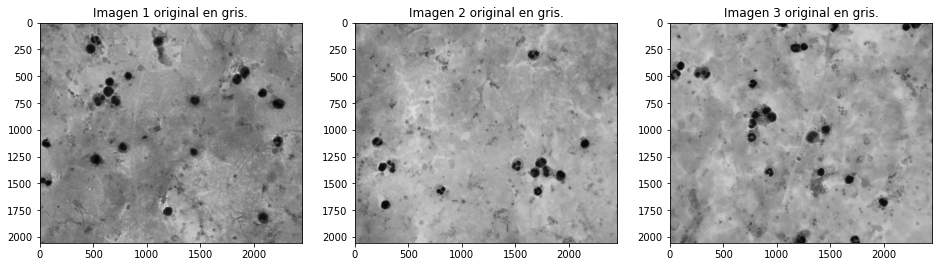

In [ ]:
img1 = cv2.imread('image_1.png')
img2 = cv2.imread('image_2.png')
img3 = cv2.imread('image_3.png')

img1gray=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2gray=cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3gray=cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(16, 8))

plt.subplot(131)
plt.title('Imagen 1 original en gris.')
plt.imshow(img1gray, cmap='gray')
plt.subplot(132)
plt.title('Imagen 2 original en gris.')
plt.imshow(img2gray, cmap='gray')
plt.subplot(133)
plt.title('Imagen 3 original en gris.')
plt.imshow(img3gray, cmap='gray')

plt.show()

Podemos observar que en términos de distinción del fondo y los leucocitos, los resultados obtenidos en gris son similares al del espacio azul pero es más sensible a los bordes de los leucocitos. Teniendo en cuenta lo anterior, trabajaremos en gris.

Ahora, llevaremos a cabo un proceso de **filtrado**. Lo primero que haremos en esta étapa será aplicar un filtro bilateral que permitirá suavizar el fondo mientras distingue mejor los leucocitos

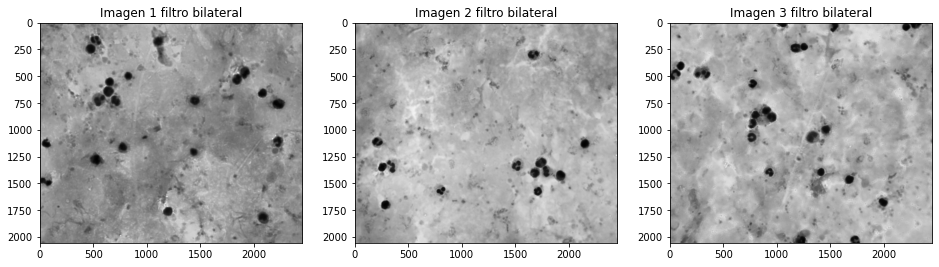

In [ ]:
img1gray = cv2.bilateralFilter(img1gray,10,50,50)
img2gray = cv2.bilateralFilter(img2gray,10,50,50)
img3gray = cv2.bilateralFilter(img3gray,10,50,50)

plt.figure(figsize=(16, 8))

plt.subplot(131)
plt.title('Imagen 1 filtro bilateral')
plt.imshow(img1gray, cmap='gray')
plt.subplot(132)
plt.title('Imagen 2 filtro bilateral')
plt.imshow(img2gray, cmap='gray')
plt.subplot(133)
plt.title('Imagen 3 filtro bilateral')
plt.imshow(img3gray, cmap='gray')

plt.show()

Podemos ver que el filtro cumple su objetivo y se eliminó ruido del fondo. Antes de proceder con la segmentación realizaremos una **modificación de contraste**, con el objetivo de disminuirlo y que se recuperen los bordes que recubren los núcleos de los leucocitos.

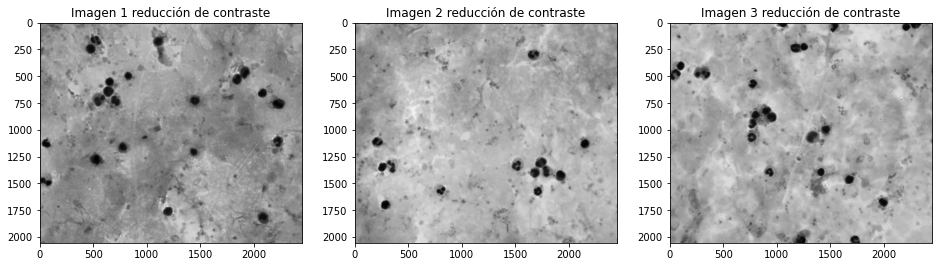

In [ ]:
#Pasamos al formato HSV.
img1_hsv= cv2.cvtColor(img1gray, cv2.COLOR_GRAY2RGB)
img2_hsv= cv2.cvtColor(img2gray, cv2.COLOR_GRAY2RGB)
img3_hsv= cv2.cvtColor(img3gray, cv2.COLOR_GRAY2RGB)

img1_hsv= cv2.cvtColor(img1_hsv, cv2.COLOR_RGB2HSV)
img2_hsv= cv2.cvtColor(img2_hsv, cv2.COLOR_RGB2HSV)
img3_hsv= cv2.cvtColor(img3_hsv, cv2.COLOR_RGB2HSV)

#Separamos los canales.
H1, S1, V1= cv2.split(img1_hsv)
H2, S2, V2= cv2.split(img2_hsv)
H3, S3, V3= cv2.split(img3_hsv)

#Aplicamos la reduccion de contraste.
V1= np.uint8(V1*0.9)
V2= np.uint8(V2*0.9)
V3= np.uint8(V3*0.9)

V1[V1>=254]= 254
V2[V2>=254]= 254
V3[V3>=254]= 254

#Unimos los canales y se pasa otra vez a gris
img1_hsv=cv2.merge((H1, S1, V1))
img2_hsv=cv2.merge((H2, S2, V2))
img3_hsv=cv2.merge((H3, S3, V3))

img1rgb=cv2.cvtColor(img1_hsv, cv2.COLOR_HSV2RGB)
img2rgb=cv2.cvtColor(img2_hsv, cv2.COLOR_HSV2RGB)
img3rgb=cv2.cvtColor(img3_hsv, cv2.COLOR_HSV2RGB)

img1gray=cv2.cvtColor(img1rgb, cv2.COLOR_RGB2GRAY)
img2gray=cv2.cvtColor(img2rgb, cv2.COLOR_RGB2GRAY)
img3gray=cv2.cvtColor(img3rgb, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(16, 8))

plt.subplot(131)
plt.title('Imagen 1 reducción de contraste')
plt.imshow(img1gray, cmap='gray')
plt.subplot(132)
plt.title('Imagen 2 reducción de contraste')
plt.imshow(img2gray, cmap='gray')
plt.subplot(133)
plt.title('Imagen 3 reducción de contraste')
plt.imshow(img3gray, cmap='gray')

plt.show()

Como se ha discutido en clase, la umbralización con OTSU no es apropiada en este caso dado que la región en la que se ubican los leucocitos es muy pequeña en comparación con el fondo, que no es uniforme. En este sentido, el umbral que definirá OTSU será demasiado alto y hará una mala segmentación. Entonces, lo que haremos será definir una segmentación manual a partir de los histogramas de las imagenes.

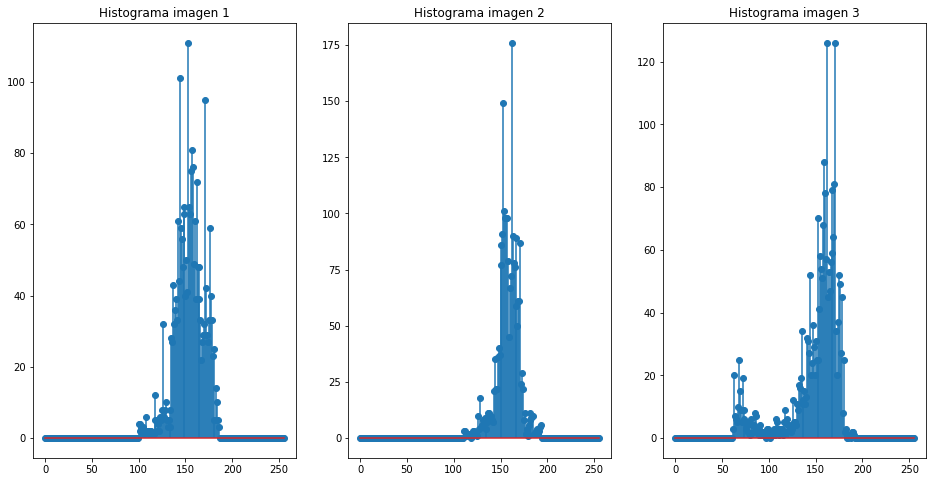

In [ ]:
hist1=cv2.calcHist(img1gray, [0], None, [256], [0, 256])
hist2=cv2.calcHist(img2gray, [0], None, [256], [0, 256])
hist3=cv2.calcHist(img3gray, [0], None, [256], [0, 256])


plt.figure(figsize=(16, 8))

plt.subplot(131)
plt.title('Histograma imagen 1')
plt.stem(hist1)
#plt.axvline(100, 0, 2000, color='r')
plt.subplot(132)
plt.title('Histograma imagen 2')
plt.stem(hist2)
#plt.axvline(100, 0, 2000, color='r')
plt.subplot(133)
plt.title('Histograma imagen 3')
plt.stem(hist3)
#plt.axvline(100, 0, 2000, color='r')

plt.show()


pass

Podemos observar que los puntos criticos de cambio se encuentran alrededor de 100, así que definiremos el umbral en 100

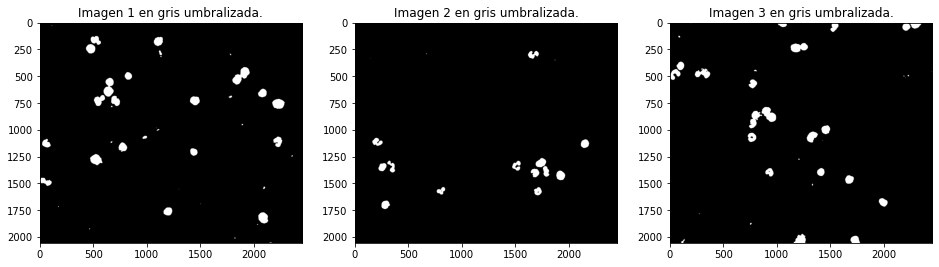

In [ ]:
umbral=100

[_, img1gray2]=cv2.threshold(img1gray, umbral, 255, cv2.THRESH_BINARY)
[_, img2gray2]=cv2.threshold(img2gray, umbral, 255, cv2.THRESH_BINARY)
[_, img3gray2]=cv2.threshold(img3gray, umbral, 255, cv2.THRESH_BINARY)

[k, img1gray3]=cv2.threshold(img1gray2, 0, 255, cv2.THRESH_BINARY_INV)
[k, img2gray3]=cv2.threshold(img2gray2, 0, 255, cv2.THRESH_BINARY_INV)
[k, img3gray3]=cv2.threshold(img3gray2, 0, 255, cv2.THRESH_BINARY_INV)


plt.figure(figsize=(16, 8))
plt.subplot(131)
plt.title('Imagen 1 en gris umbralizada.')
plt.imshow(img1gray3, cmap='gray')

plt.subplot(132)
plt.title('Imagen 2 en gris umbralizada.')
plt.imshow(img2gray3, cmap='gray')

plt.subplot(133)
plt.title('Imagen 3 en gris umbralizada.')
plt.imshow(img3gray3, cmap='gray')

plt.show()

Se puede ver que la umbralización manual separa los leucocitos pero aún es un poco sensible al ruido, y no separa los leucocitos que se encuentran muy cerca de los demás, así que llevaremos a cabo procesos de erosión y dilatación para buscar corregir estos problemas. Utilizamos como elemento estructurante una elipse teniendo en cuenta la forma de los leucocitos.

Dividimos la imagen en regiones, ya que diferentes regiones tienen diferentes problemas. Podemos ver que el la parte superior izquierda de la imagen 1 y 3 hay leucocitos muy juntos que se perciben como uno solo, y que en la imagen 2 esta region no tiene leucocitos así que no se vería afectada si se le aplica un proceso enfocado en resolver los problemas de las otras imagenes

En los demás cuadrantes igual hay que llevar a cabo procesos de erosión y dilatación para eliminar ruido, pero debe tratarse por separado con respecto a la otra sección ya que las erosiones extra que se llevan a cabo para separar los leucocitos que están muy juntos, terminan por separar un solo leucocito en otras áreas.

Somos conscientes de que esta solución es específica para las tres imagenes del problema y al introducir una nueva imagen con una distribución diferente puede no servir. Sin embargo creemos que el análisis por secciones puede ser útil (ya sean cuadrantes, octantes o regiones irregulares) y que podría generalizarse implementando algún método de inteligencia artificial o clasificación.

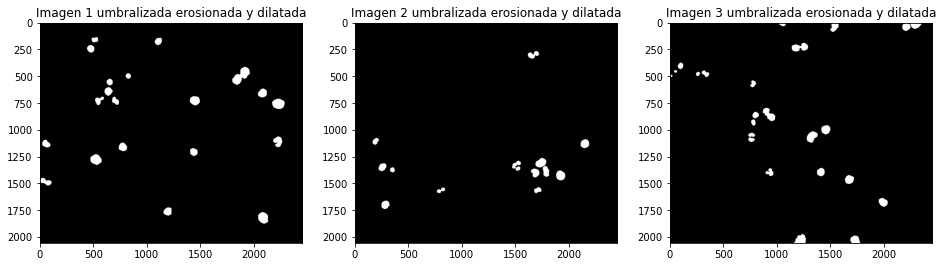

In [ ]:
kernel= cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

y,x=img1gray3.shape
pm_v= int(y/2)
pm_h= int(x/2)

# Superior izquierda

img1gray3[:pm_v, :pm_h]=cv2.erode(img1gray3[:pm_v, :pm_h], kernel, iterations=10)
img1gray3[:pm_v, :pm_h]=cv2.dilate(img1gray3[:pm_v, :pm_h], kernel, iterations=6)

img2gray3[:pm_v, :pm_h]=cv2.erode(img2gray3[:pm_v, :pm_h], kernel, iterations=10)
img2gray3[:pm_v, :pm_h]=cv2.dilate(img2gray3[:pm_v, :pm_h], kernel, iterations=6)

img3gray3[:pm_v, :pm_h]=cv2.erode(img3gray3[:pm_v, :pm_h], kernel, iterations=10)
img3gray3[:pm_v, :pm_h]=cv2.dilate(img3gray3[:pm_v, :pm_h], kernel, iterations=6)

# Mitad derecha

img1gray3[:, pm_h:]=cv2.erode(img1gray3[:, pm_h:], kernel, iterations=7)
img1gray3[:, pm_h:]=cv2.dilate(img1gray3[:, pm_h:], kernel, iterations=8)

img2gray3[:, pm_h:]=cv2.erode(img2gray3[:, pm_h:], kernel, iterations=7)
img2gray3[:, pm_h:]=cv2.dilate(img2gray3[:, pm_h:], kernel, iterations=8)

img3gray3[:, pm_h:]=cv2.erode(img3gray3[:, pm_h:], kernel, iterations=7)
img3gray3[:, pm_h:]=cv2.dilate(img3gray3[:, pm_h:], kernel, iterations=8)


# Inferior izquierda

img1gray3[pm_v:, :pm_h]=cv2.erode(img1gray3[pm_v:, :pm_h], kernel, iterations=8)
img1gray3[pm_v:, :pm_h]=cv2.dilate(img1gray3[pm_v:, :pm_h], kernel, iterations=8)

img2gray3[pm_v:, :pm_h]=cv2.erode(img2gray3[pm_v:, :pm_h], kernel, iterations=8)
img2gray3[pm_v:, :pm_h]=cv2.dilate(img2gray3[pm_v:, :pm_h], kernel, iterations=8)

img3gray3[pm_v:, :pm_h]=cv2.erode(img3gray3[pm_v:, :pm_h], kernel, iterations=8)
img3gray3[pm_v:, :pm_h]=cv2.dilate(img3gray3[pm_v:, :pm_h], kernel, iterations=8)


plt.figure(figsize=(16, 8))
plt.subplot(131)
plt.title('Imagen 1 umbralizada erosionada y dilatada')
plt.imshow(img1gray3, cmap='gray')

plt.subplot(132)
plt.title('Imagen 2 umbralizada erosionada y dilatada')
plt.imshow(img2gray3, cmap='gray')

plt.subplot(133)
plt.title('Imagen 3 umbralizada erosionada y dilatada')
plt.imshow(img3gray3, cmap='gray')


plt.show()

Con las máscaras obtenidas hasta ahora, procederemos a realizar el conteo de objetos con la función cv2.connectedComponents

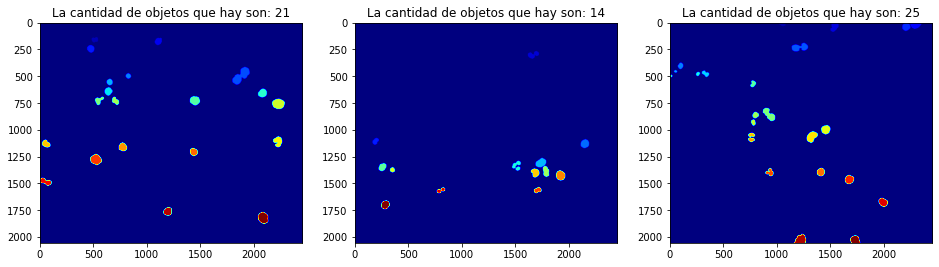

In [ ]:
# Objetos im 1 : 22
# Objetos im 2 : 14
# Objetos im 2 : 24

[cnt1, markers1] = cv2.connectedComponents(img1gray3)
[cnt2, markers2] = cv2.connectedComponents(img2gray3)
[cnt3, markers3] = cv2.connectedComponents(img3gray3)

plt.figure(figsize=(16,16))

plt.subplot(131)
plt.title(f'La cantidad de objetos que hay son: {cnt1}')
plt.imshow(markers1, cmap='jet')

plt.subplot(132)
plt.title(f'La cantidad de objetos que hay son: {cnt2}')
plt.imshow(markers2, cmap='jet')

plt.subplot(133)
plt.title(f'La cantidad de objetos que hay son: {cnt3}')
plt.imshow(markers3, cmap='jet')
plt.show()

En la imagen 1 hay en realidad 22 objetos, en la imagen 2 hay 14 objetos y en la tercera imagen hay 24 objetos. En este sentido podemos ver que se acerca mucho al conteo correcto. Sin embargo, hay que considerar que no siempre hace la segmentación correcta.

Teniendo en cuenta que este proyecto prioriza el conteo sobre la segmentación, ya que es eso lo que genera el disgnóstico, a mayor escala podría probarse la hipótesis de que los leucocitos que se separan en algunos lados compensan los que se unen con otros y que un buen conteo no siempre implica una segmentación más acertada.

Para terminar, con los objetos identificados realizaremos la **segmentación por Watershed** y **evaluaremos las máscaras** obtenidas con el índice de Jaccard.

El primer paso de esta étapa es encontrar el fondo.

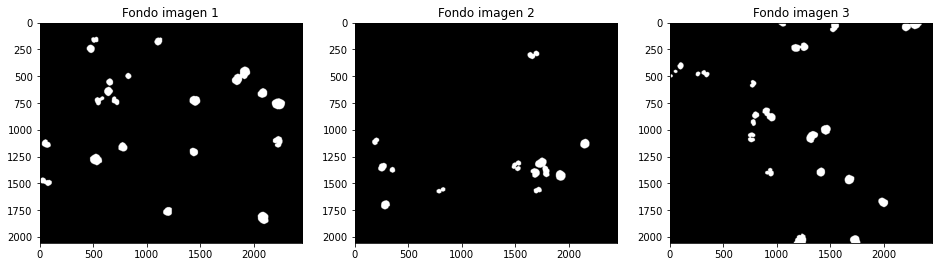

In [ ]:
kernel2= cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

background1= cv2.dilate(img1gray3, kernel2, iterations=3)
background2= cv2.dilate(img2gray3, kernel2, iterations=3)
background3= cv2.dilate(img3gray3, kernel2, iterations=3)

plt.figure(figsize=(16, 8))
plt.subplot(131)
plt.title('Fondo imagen 1')
plt.imshow(background1, cmap='gray')

plt.subplot(132)
plt.title('Fondo imagen 2')
plt.imshow(background2, cmap='gray')

plt.subplot(133)
plt.title('Fondo imagen 3')
plt.imshow(background3, cmap='gray')


plt.show()

Ahora, restaremos el fondo de los objetos para encontrar la región compartida.

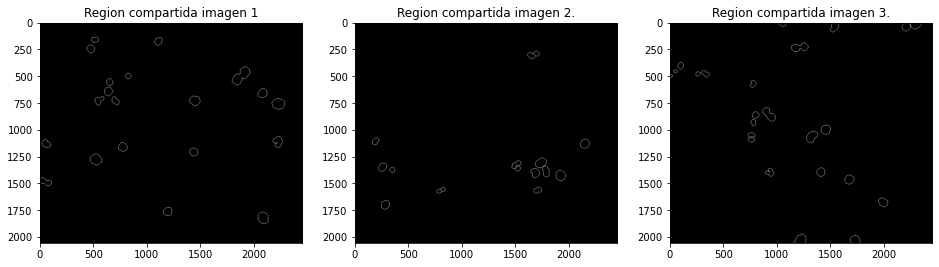

In [ ]:
unknown1= cv2.subtract(background1, img1gray3)
unknown2= cv2.subtract(background2, img2gray3)
unknown3= cv2.subtract(background3, img3gray3)

plt.figure(figsize=(16,16))
plt.subplot(131)
plt.title(f'Region compartida imagen 1')
plt.imshow(unknown1, cmap='gray')

plt.subplot(132)
plt.title(f'Region compartida imagen 2.')
plt.imshow(unknown2, cmap='gray')

plt.subplot(133)
plt.title(f'Region compartida imagen 3.')
plt.imshow(unknown3, cmap='gray')

plt.show()

Ahora, vamos a realizar la segmentacion por watershed.

In [ ]:
markers1_2 = markers1 + 1
markers2_2 = markers2 + 1
markers3_2 = markers3 + 1
markers1_2[unknown1==255] = 0
markers2_2[unknown2==255] = 0
markers3_2[unknown3==255] = 0

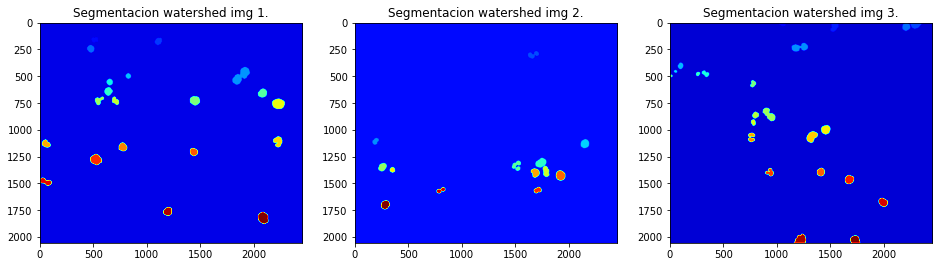

In [ ]:
markers1_new= cv2.watershed(img1rgb, markers1_2)
markers2_new= cv2.watershed(img2rgb, markers2_2)
markers3_new= cv2.watershed(img3rgb, markers3_2)

markers1_new= markers1_new-1
markers2_new= markers2_new-1
markers3_new= markers3_new-1

plt.figure(figsize=(16,16))
plt.subplot(131)
plt.title('Segmentacion watershed img 1.')
plt.imshow(markers1_new, cmap='jet')
plt.subplot(132)
plt.title('Segmentacion watershed img 2.')
plt.imshow(markers2_new, cmap='jet')
plt.subplot(133)
plt.title('Segmentacion watershed img 3.')
plt.imshow(markers3_new, cmap='jet')

plt.show()

Por utlimo, podemos evaluar las mascaras con el indice de Jaccard.

Comenzamos evaluando las mascaras de Watershed

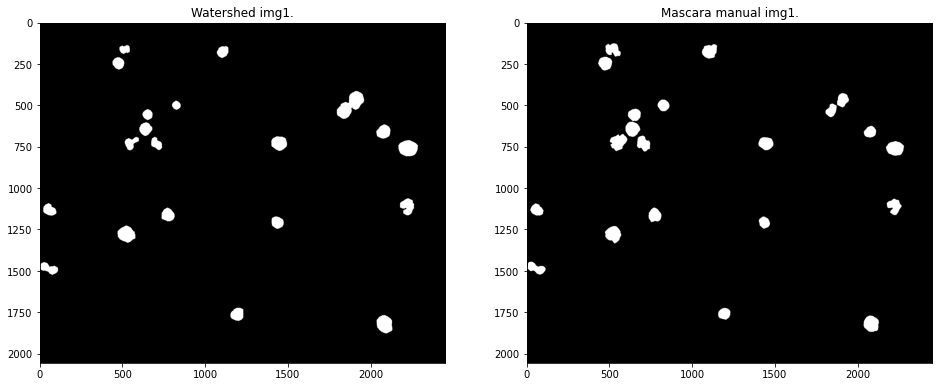

In [ ]:
wmask1 = np.uint8(markers1_new == 1)
wmask2 = np.uint8(markers2_new == 1)
wmask3 = np.uint8(markers3_new == 1)
for i in range(1, cnt1 - 1):
  wmask1 = np.bitwise_or(wmask1, np.uint8(markers1_new == (i+1)))
for i in range(1, cnt2 - 1):
  wmask2 = np.bitwise_or(wmask2, np.uint8(markers2_new == (i+1)))
for i in range(1, cnt3 - 1):
  wmask3 = np.bitwise_or(wmask3, np.uint8(markers3_new == (i+1)))

maskman1= cv2.imread('image_1_mask.png')
maskman1= cv2.cvtColor(maskman1, cv2.COLOR_BGR2GRAY)

maskman2= cv2.imread('image_2_mask.png')
maskman2= cv2.cvtColor(maskman2, cv2.COLOR_BGR2GRAY)

maskman3= cv2.imread('image_3_mask.png')
maskman3= cv2.cvtColor(maskman3, cv2.COLOR_BGR2GRAY)


[_, maskwat1]=cv2.threshold(wmask1, 0, 1, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
[_, maskman1]=cv2.threshold(maskman1, 0, 1, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)

plt.figure(figsize=(16,16))
plt.subplot(121)
plt.title('Watershed img1.')
plt.imshow(maskwat1, cmap='gray')

plt.subplot(122)
plt.title('Mascara manual img1.')
plt.imshow(maskman1, cmap='gray')

plt.show()

In [ ]:
J= jaccard_score(maskwat1, maskman1, average='micro')

print(f'Indice de Jaccard: {J*100} %')

Indice de Jaccard: 74.0606808961016 %


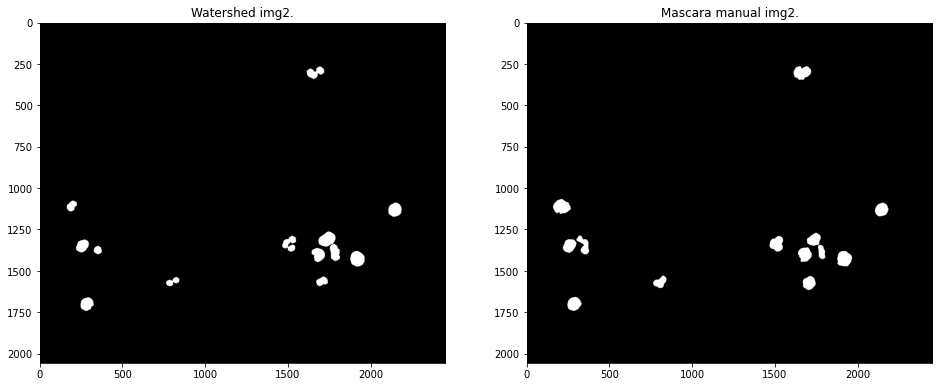

In [ ]:
[_, maskwat2]=cv2.threshold(wmask2, 0, 1, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
[_, maskman2]=cv2.threshold(maskman2, 0, 1, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)

plt.figure(figsize=(16,16))
plt.subplot(121)
plt.title('Watershed img2.')
plt.imshow(maskwat2, cmap='gray')

plt.subplot(122)
plt.title('Mascara manual img2.')
plt.imshow(maskman2, cmap='gray')

plt.show()

In [ ]:
J= jaccard_score(maskwat2, maskman2, average='micro')

print(f'Indice de Jaccard: {J*100} %')

Indice de Jaccard: 72.19088997507346 %


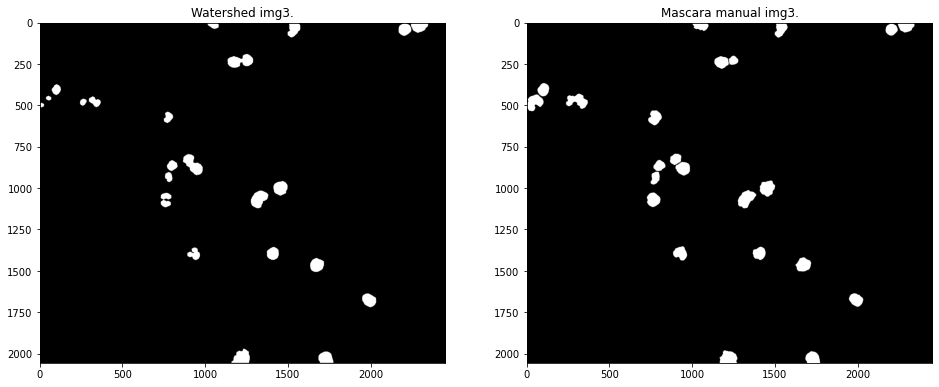

In [ ]:
[_, maskwat3]=cv2.threshold(wmask3, 0, 1, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
[_, maskman3]=cv2.threshold(maskman3, 0, 1, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)

plt.figure(figsize=(16,16))
plt.subplot(121)
plt.title('Watershed img3.')
plt.imshow(maskwat3, cmap='gray')

plt.subplot(122)
plt.title('Mascara manual img3.')
plt.imshow(maskman3, cmap='gray')

plt.show()

In [ ]:
J= jaccard_score(maskwat3, maskman3, average='micro')

print(f'Indice de Jaccard: {J*100} %')

Indice de Jaccard: 76.0613354877937 %


Procedemos a evaluar las mascaras realizadas con umbralizacion manual para comparar los resultados con watershed.

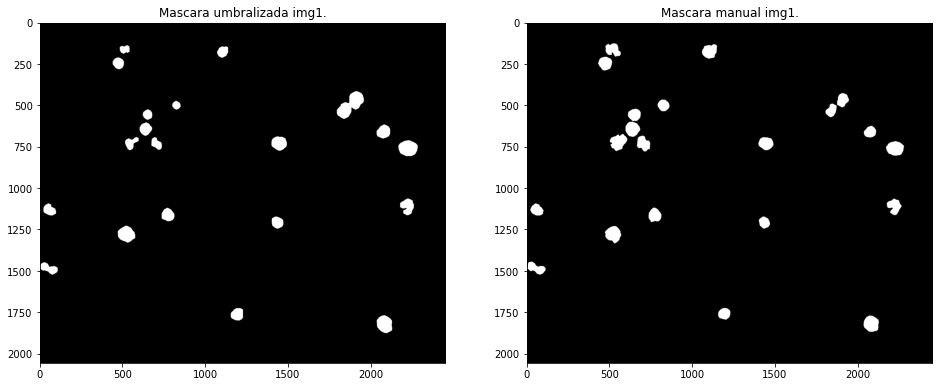

In [ ]:
markers1[markers1>0]=255
plt.figure(figsize=(16,16))
plt.subplot(121)
plt.title('Mascara umbralizada img1.')
plt.imshow(markers1, cmap='gray')

plt.subplot(122)
plt.title('Mascara manual img1.')
plt.imshow(maskman1, cmap='gray')

plt.show()

In [ ]:

J= jaccard_score(markers1, maskman1, average='micro')

print(f'Indice de Jaccard: {J*100} %')

Indice de Jaccard: 73.50664440953129 %


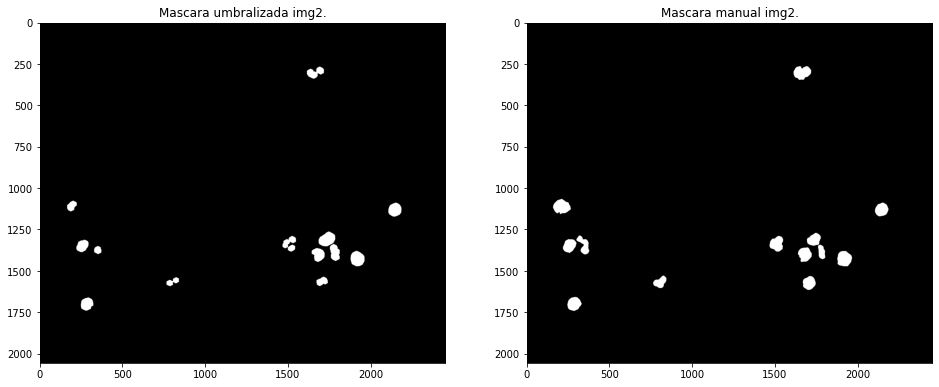

In [ ]:
markers2[markers2>0]=255
plt.figure(figsize=(16,16))
plt.subplot(121)
plt.title('Mascara umbralizada img2.')
plt.imshow(markers2, cmap='gray')

plt.subplot(122)
plt.title('Mascara manual img2.')
plt.imshow(maskman2, cmap='gray')

plt.show()

In [ ]:

J= jaccard_score(markers2, maskman2, average='micro')

print(f'Indice de Jaccard: {J*100} %')

Indice de Jaccard: 69.8293101991381 %


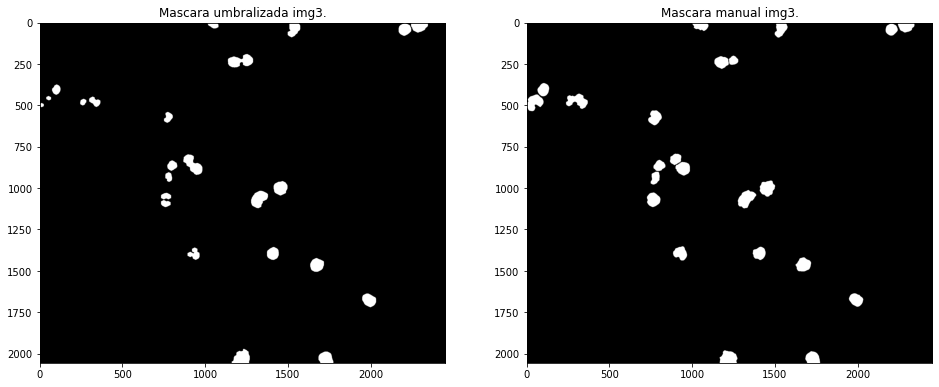

In [ ]:
markers3[markers3>0]=255
plt.figure(figsize=(16,16))
plt.subplot(121)
plt.title('Mascara umbralizada img3.')
plt.imshow(markers3, cmap='gray')

plt.subplot(122)
plt.title('Mascara manual img3.')
plt.imshow(maskman3, cmap='gray')

plt.show()

In [ ]:

J= jaccard_score(markers3, maskman3, average='micro')

print(f'Indice de Jaccard: {J*100} %')

Indice de Jaccard: 73.95572036208965 %


Podemos observar que en todos los casos, se obtiene un índice de Jaccard mayor con la segmentación por Watershed, que con la máscara obtenida a partir de la umbralización manual y los cambios en morfología.

**CONCLUSIONES**

El conteo obtenido a partir de la umbralización manual, la modificación de contraste, los procesos de erosión y dilatación, es bastante cercano a los valores reales, aunque los objetos identificados no siempre correspondan a los que debería indicar según las máscaras manuales.

Esto puede indicar que una mayor precisión en máscaras no siempre es igual a un mejor conteo de objetos.

La umbralización por OTSU no es conveniente cuando la región a segmentar tiene un área significativamente menor a la del fondo y se tiene un fondo que presenta grandes variaciones en sus valores. En estos casos puede resultar mejor obtener umbrales a partir de los histogramas de color.

Se obtienen mejores resultados trabajando por regiones, pero también son más difíciles de generalizar para implementar el algoritmo con más imágenes.